# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

C:\Users\user\AppData\Local\Temp/ipykernel_1204/1630213376.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


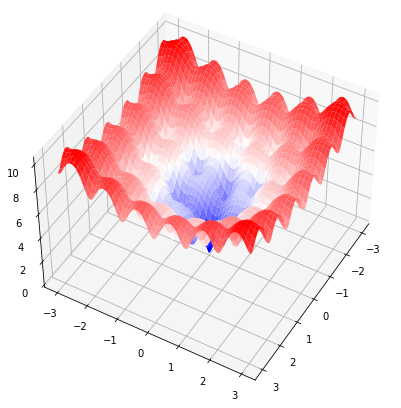

In [3]:
fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-3, 3, 0.01)
Y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(X, Y)
Z = ackley(np.array([X, Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

In [5]:
result = differential_evolution(ackley, bounds, seed=21)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2973
     nit: 96
 success: True
       x: array([0., 0.])

     
# strategy - str, optional

    The differential evolution strategy to use. Should be one of:
            ‘best1bin’
            ‘best1exp’
            ‘rand1exp’
            ‘randtobest1exp’
            ‘currenttobest1exp’
            ‘best2exp’
            ‘rand2exp’
            ‘randtobest1bin’
            ‘currenttobest1bin’
            ‘best2bin’
            ‘rand2bin’
            ‘rand1bin’

    The default is ‘best1bin’.

In [6]:
result = differential_evolution(ackley, bounds, seed=42, strategy='rand1exp')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7473
     nit: 246
 success: True
       x: array([0., 0.])

In [7]:
# график количества итераций (nit) оптимизации функции ackley от значения параметра strategy
strategys = ('best1bin',
             'best1exp',
             'rand1exp',
             'randtobest1exp',
             'currenttobest1exp',
             'best2exp',
             'rand2exp',
             'randtobest1bin',
             'currenttobest1bin',
             'best2bin',
             'rand2bin',
             'rand1bin')
number_iterations = []

for strategy in strategys:
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
    number_iterations.append(result.nit)


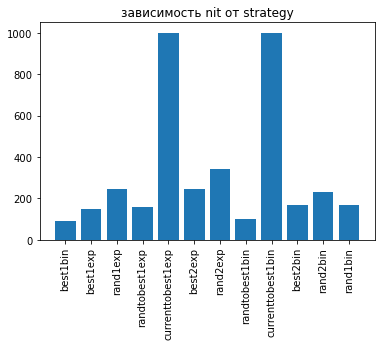

In [8]:
fig, ax = plt.subplots()

ax.bar(strategys, number_iterations)
plt.xticks(rotation = 90) 
plt.title('зависимость nit от strategy')
plt.show()

# popsize - int, optional

    A multiplier for setting the total population size. The population has popsize * N individuals. This keyword is overridden if an initial population is supplied via the init keyword. When using init='sobol' the population size is calculated as the next power of 2 after popsize * N.


In [9]:
result = differential_evolution(ackley, bounds, seed=21, popsize=1)
result

     fun: 2.5799275570323066
     jac: array([-1.59872116e-05, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 101
     nit: 15
 success: True
       x: array([-2.96502872e-07,  9.52166524e-01])

In [10]:
result = differential_evolution(ackley, bounds, seed=21, popsize=100)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 19863
     nit: 98
 success: True
       x: array([0., 0.])

In [11]:
result = differential_evolution(ackley, bounds, seed=21, init='sobol')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3391
     nit: 103
 success: True
       x: array([0., 0.])

In [12]:
# график количества итераций (nit) оптимизации функции ackley от значения параметра popsize
popsizes = np.arange(1 , 11, 1)
number_iterations = []

for popsize in popsizes:
    result = differential_evolution(ackley, bounds, seed=42, popsize=popsize)
    number_iterations.append(result.nit)

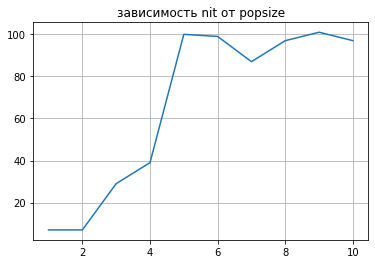

In [13]:
plt.plot(popsizes, number_iterations)
plt.title('зависимость nit от popsize')
plt.grid() 
plt.show()

# mutation - float or tuple(float, float), optional

    The mutation constant. In the literature this is also known as differential weight, being denoted by F. If specified as a float it should be in the range [0, 2]. If specified as a tuple (min, max) dithering is employed. Dithering randomly changes the mutation constant on a generation by generation basis. The mutation constant for that generation is taken from U[min, max). Dithering can help speed convergence significantly. Increasing the mutation constant increases the search radius, but will slow down convergence.


In [14]:
result = differential_evolution(ackley, bounds, seed=21, mutation=0.5)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1863
     nit: 59
 success: True
       x: array([0., 0.])

In [15]:
result = differential_evolution(ackley, bounds, seed=21, mutation=1.5)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 8883
     nit: 293
 success: True
       x: array([0., 0.])

In [16]:
# графики количества итераций (nit) оптимизации функции ackley от значения параметра popsize
mutations = np.arange(0. , 2., 0.2)
number_iterations = []

for mutation in mutations:
    result = differential_evolution(ackley, bounds, seed=42, mutation=mutation)
    number_iterations.append(result.nit)

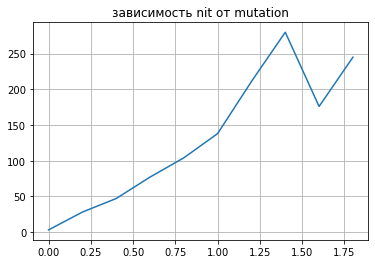

In [17]:
plt.plot(mutations, number_iterations)
plt.title('зависимость nit от mutation')
plt.grid() 
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [18]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [19]:
result_m = minimize(ackley, x0,  method='Nelder-Mead', options={'xtol':1e-8,'disp':True})
result_m

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 63


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [ 7.29128068e-09, -1.65075114e-09],
       [ 2.51112912e-09, -8.55170894e-09]]), array([4.44089210e-16, 2.11447895e-08, 2.52091259e-08]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 63
           nit: 31
        status: 0
       success: True
             x: array([0., 0.])

In [20]:
result_m = minimize(ackley, x0,  method='Nelder-Mead', options={'xtol':1e-3,'disp':True})
result_m

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 17


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
